In [1]:
# Import packages
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Import data
retail = pd.read_csv('online_retail2.csv').drop_duplicates(ignore_index=True).dropna(axis=0, how='any')
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['date'] = retail['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail['date'] = pd.to_datetime(retail['date'])
retail['week'] = retail['date'].dt.isocalendar().week
retail['month'] = retail['date'].dt.month
retail['year'] = retail['date'].dt.year
retail['month'] = retail['month'].astype('category')
retail = retail.groupby(by = ['week', 'month', 'year']).agg(date = ('date', 'first'), total_quantity = ('Quantity', 'sum')).sort_values(by = 'date').reset_index()
retail = retail.dropna(axis = 0, subset = 'date')
retail.head()

C:\Users\thanh\AppData\Local\Temp\ipykernel_10612\2632304757.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retail = retail.groupby(by = ['week', 'month', 'year']).agg(date = ('date', 'first'), total_quantity = ('Quantity', 'sum')).sort_values(by = 'date').reset_index()


,week,month,year,date,total_quantity
0,49,12,2009,2009-12-01,135196
1,50,12,2009,2009-12-07,104670
2,51,12,2009,2009-12-14,124847
3,52,12,2009,2009-12-21,24082
4,1,1,2010,2010-01-04,95566


In [3]:
# Feature column
retail['trend'] = np.arange(1, len(retail)+1, 1)
X = retail[['week', 'month', 'trend']]
X = pd.get_dummies(X)

# Output column
Y = retail[['total_quantity']]

In [4]:
# Fit the model
model = LinearRegression()
model.fit(X, Y)
print(model.intercept_)
print(model.coef_)

[76313.60540946]
[[   612.88375735   -155.86209808  -1375.54957681  -3938.82393715
    8036.06767351 -15525.55686545 -12220.18158944  -8524.55865168
  -15274.48319065 -10157.99661653  13759.31502312  16391.88120822
   39201.31323688 -10371.42671402]]


RMSE: 35908.31776234503


<Axes: xlabel='date', ylabel='total_quantity'>

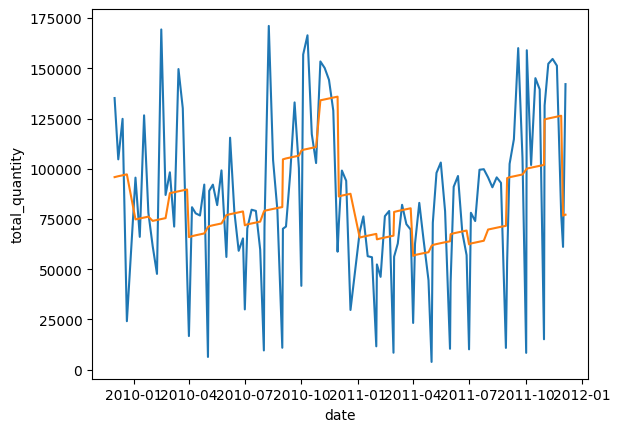

In [5]:
# Predict historical data
retail['prediction'] = model.predict(X)
retail['squared_error'] = (retail['total_quantity'] - retail['prediction'])**2
print(f'''RMSE: {math.sqrt(retail['squared_error'].mean())}''')
sns.lineplot(data = retail, x = retail['date'], y = retail['total_quantity'])
sns.lineplot(data = retail, x = retail['date'], y = retail['prediction'])

In [6]:
# Predict the future
max_date = retail['date'].max()
dates = pd.DataFrame({'date': pd.date_range(start=max_date, end='2012-12-31', freq='W')})
retail = pd.concat([retail, dates], axis = 0)
retail['week'] = retail['date'].dt.isocalendar().week
retail['month'] = retail['date'].dt.month
retail['month'] = retail['month'].astype('category')
retail['trend'] = np.arange(1, len(retail)+1, 1)
retail = retail.sort_values(by='date')

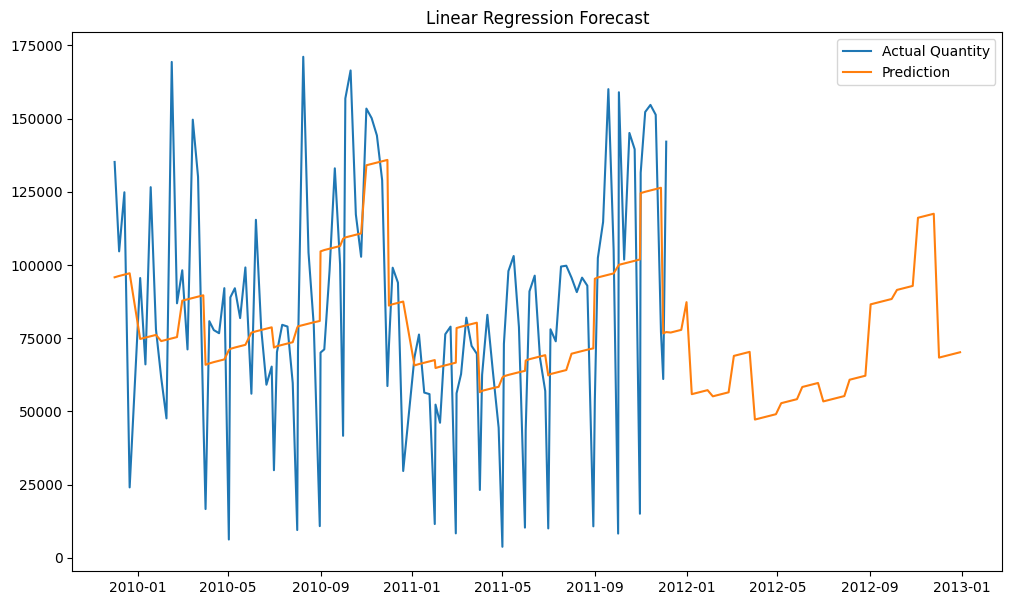

In [7]:
# Prepare data for linear regression
X_predict = retail[['week', 'month', 'trend']]
X_predict = pd.get_dummies(X_predict)

# Predict the future
retail['prediction'] = model.predict(X_predict)
plt.subplots(figsize=(12, 7))
plt.plot(retail['date'], retail['total_quantity'], label ='Actual Quantity')
plt.plot(retail['date'], retail['prediction'], label='Prediction')
plt.title('Linear Regression Forecast')
plt.legend()